<a href="https://colab.research.google.com/github/mayur0408/Nueral_network_practice/blob/main/churn_modelling_bank_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
# drop first three columns as they do not contribute much to prediction !
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.shape

(10000, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [47]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


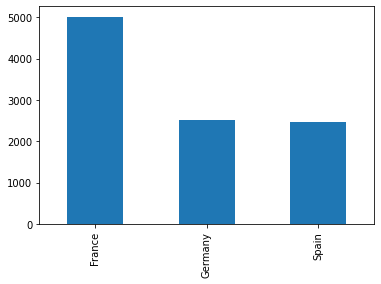

In [48]:
df['Geography'].value_counts().plot.bar()

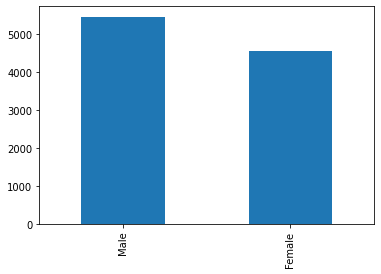

In [49]:
df['Gender'].value_counts().plot.bar()

In [50]:
df1=pd.get_dummies(df,drop_first=True)
df1.shape

(10000, 12)

In [51]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [52]:
X=df1.drop(['Exited'],axis=1)
Y=df1['Exited'].copy()

In [53]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [54]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [56]:
X.shape

(10000, 11)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [58]:
import keras

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [60]:
classifier=Sequential()

In [61]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7076 - accuracy: 0.6163 - val_loss: 0.5282 - val_accuracy: 0.7880
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.7891 - val_loss: 0.4666 - val_accuracy: 0.8001
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7995 - val_loss: 0.4547 - val_accuracy: 0.8031
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8067 - val_loss: 0.4506 - val_accuracy: 0.8057
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8038 - val_loss: 0.4485 - val_accuracy: 0.8113
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8058 - val_loss: 0.4441 - val_accuracy: 0.8170
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8146 - val_loss: 0.4407 - val_accuracy: 0.8178

In [65]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)
print(Y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print('Train Accuracy :',accuracy_score(Y_train,Y_pred))
print('Test Accuracy :',accuracy_score(Y_test,Y_pred))

[[2338   78]
 [ 366  218]]
0.852
